# Read and prepare data for machine learning

In [72]:
import pandas as pd

weather = pd.read_csv('Pearson Airport Weather.csv', index_col = 'DATE')

In [73]:
weather

,STATION,NAME,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,,,
1970-01-01,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,0.0,5.1,17,1
1970-01-02,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,0.0,5.1,23,-3
1970-01-03,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.08,2.0,5.1,18,12
1970-01-04,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,0.0,7.1,17,4
1970-01-05,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,0.0,7.1,21,9
...,...,...,...,...,...,...,...
2013-06-08,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,0.0,NaN,69,55
2013-06-09,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.00,0.0,NaN,73,52
2013-06-10,CA006158733,"TORONTO LESTER B. PEARSON INT, ON CA",0.87,0.0,NaN,63,60


In [74]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
PRCP       0.000000
SNOW       0.000000
SNWD       0.005187
TMAX       0.000000
TMIN       0.000000
dtype: float64

In [75]:
core_weather = weather[['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN']].copy()

In [76]:
core_weather.columns = ['precip', 'snow', 'snow_depth', 'temp_max', 'temp_min']

In [77]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-01-01,0.00,0.0,5.1,17,1
1970-01-02,0.00,0.0,5.1,23,-3
1970-01-03,0.08,2.0,5.1,18,12
1970-01-04,0.00,0.0,7.1,17,4
1970-01-05,0.00,0.0,7.1,21,9
...,...,...,...,...,...
2013-06-08,0.00,0.0,NaN,69,55
2013-06-09,0.00,0.0,NaN,73,52
2013-06-10,0.87,0.0,NaN,63,60


# Handle missing values

In [78]:
core_weather.apply(pd.isnull).sum() / core_weather.shape[0]

precip        0.000000
snow          0.000000
snow_depth    0.005187
temp_max      0.000000
temp_min      0.000000
dtype: float64

In [79]:
core_weather['snow_depth'].value_counts()
# If there there isn't much snow, delete this column
# del core_weather['snow_depth']

snow_depth
0.0     12555
1.2       378
0.4       364
0.8       300
2.0       270
3.1       202
1.6       196
3.9       168
2.4       157
2.8       143
5.1       115
3.5        96
7.1        93
5.9        87
4.7        82
4.3        68
5.5        65
6.3        58
6.7        50
7.9        49
9.1        31
7.5        28
8.3        24
9.4        21
8.7        17
11.0       14
9.8        13
15.0        9
13.0        8
10.2        7
11.8        7
12.6        7
13.8        6
18.9        6
14.2        4
18.1        4
10.6        4
16.9        3
12.2        3
16.1        3
15.7        2
26.4        2
14.6        2
17.3        1
15.4        1
21.7        1
11.4        1
16.5        1
17.7        1
Name: count, dtype: int64

In [80]:
core_weather[pd.isnull(core_weather['snow_depth'])]
# See the rows where snow_depth valueis NaN

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
2013-01-13,1.17,0.0,NaN,59,40
2013-01-14,0.00,0.0,NaN,41,23
2013-01-15,0.00,0.0,NaN,34,23
2013-01-16,0.00,0.0,NaN,38,25
2013-01-30,0.11,0.0,NaN,57,42
...,...,...,...,...,...
2013-06-08,0.00,0.0,NaN,69,55
2013-06-09,0.00,0.0,NaN,73,52
2013-06-10,0.87,0.0,NaN,63,60


In [81]:
core_weather['snow'].value_counts()
# There is still lots of data with snow, so keep the column

snow
0.0    13816
0.1      383
0.2      366
0.3      118
0.4      118
       ...  
6.4        1
7.3        1
4.2        1
8.2        1
8.8        1
Name: count, Length: 75, dtype: int64

In [82]:
core_weather.loc['1970-1-1':'2010-12-31',:]

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970-10-01,0.00,0.0,0.0,56,41
1970-10-02,0.20,0.0,0.0,66,41
1970-10-03,0.06,0.0,0.0,60,42
1970-10-04,0.00,0.0,0.0,51,35
1970-10-05,0.09,0.0,0.0,57,32
...,...,...,...,...,...
2010-12-27,0.00,0.0,0.4,29,13
2010-12-28,0.00,0.0,0.0,32,23
2010-12-29,0.00,0.0,0.0,31,22


In [83]:
# replace null values with 0
# Since for most of the days, snow_depth is 0.0

core_weather['snow_depth']= core_weather['snow_depth'].fillna(0)

In [84]:
# check
core_weather.apply(pd.isnull).sum()

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

In [85]:
core_weather.dtypes

precip        float64
snow          float64
snow_depth    float64
temp_max        int64
temp_min        int64
dtype: object

In [86]:
core_weather.index

Index(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04', '1970-01-05',
       '1970-01-06', '1970-01-07', '1970-01-08', '1970-01-09', '1970-01-10',
       ...
       '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06', '2013-06-07',
       '2013-06-08', '2013-06-09', '2013-06-10', '2013-06-11', '2013-06-12'],
      dtype='object', name='DATE', length=15809)

In [87]:
# turn the index of the data into the datetime index
core_weather.index = pd.to_datetime(core_weather.index)

In [88]:
core_weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2013-06-03', '2013-06-04', '2013-06-05', '2013-06-06',
               '2013-06-07', '2013-06-08', '2013-06-09', '2013-06-10',
               '2013-06-11', '2013-06-12'],
              dtype='datetime64[ns]', name='DATE', length=15809, freq=None)

In [89]:
core_weather.index.month

Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       ...
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6],
      dtype='int32', name='DATE', length=15809)

# Handle other missing-data cases

NOAA documentation: 
Note: 9's in a field (eg.9999) indicate missing data or data that has not been received.

In [90]:
# Checked: such cases does not appear in the data set
core_weather.apply(lambda x: (x==9999).sum())

precip        0
snow          0
snow_depth    0
temp_max      0
temp_min      0
dtype: int64

# Weather Data Analyzation

<Axes: xlabel='DATE'>

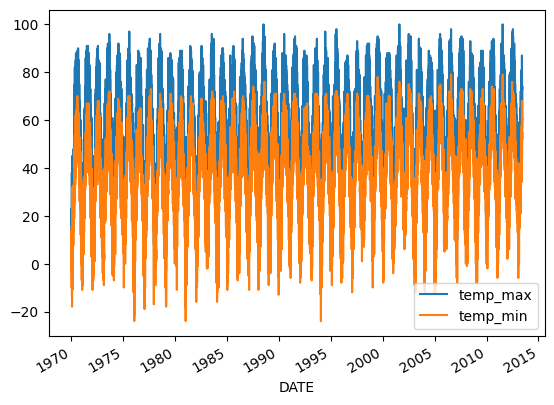

In [91]:
core_weather[['temp_max', 'temp_min']].plot()

<Axes: xlabel='DATE'>

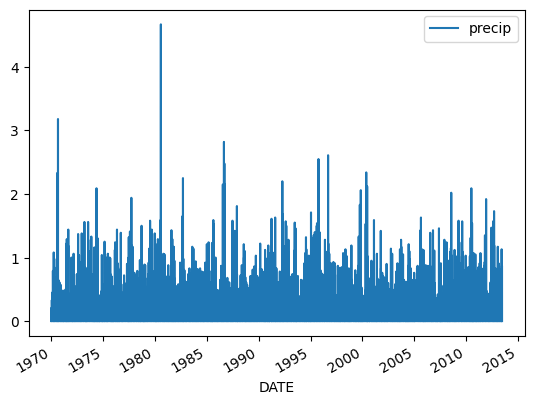

In [92]:
core_weather[['precip']].plot()

In [93]:
core_weather.groupby(core_weather.index.year).sum()

,precip,snow,snow_depth,temp_max,temp_min
DATE,,,,,
1970,29.64,62.3,469.0,19554,12723
1971,26.49,56.8,298.2,19850,12853
1972,33.66,80.6,481.4,19077,12200
1973,33.42,36.3,151.6,20356,13530
1974,31.19,43.6,185.6,19676,12700
1975,31.07,61.8,212.7,20136,13423
1976,32.54,58.0,525.8,19376,12222
1977,38.33,55.0,378.7,19658,13003
1978,27.01,44.1,431.2,19327,12294


# Machine Learning Model Training

predict the maximum temperature using historical data


In [94]:
# for each day, let the target be the next day's maximum temperature
core_weather['target'] = core_weather.shift(-1)['temp_max']

In [95]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,5.1,17,1,23.0
1970-01-02,0.00,0.0,5.1,23,-3,18.0
1970-01-03,0.08,2.0,5.1,18,12,17.0
1970-01-04,0.00,0.0,7.1,17,4,21.0
1970-01-05,0.00,0.0,7.1,21,9,23.0
...,...,...,...,...,...,...
2013-06-08,0.00,0.0,0.0,69,55,73.0
2013-06-09,0.00,0.0,0.0,73,52,63.0
2013-06-10,0.87,0.0,0.0,63,60,74.0


In [96]:
# delete the last row
core_weather = core_weather.iloc[:-1,:].copy()

In [97]:
core_weather

,precip,snow,snow_depth,temp_max,temp_min,target
DATE,,,,,,
1970-01-01,0.00,0.0,5.1,17,1,23.0
1970-01-02,0.00,0.0,5.1,23,-3,18.0
1970-01-03,0.08,2.0,5.1,18,12,17.0
1970-01-04,0.00,0.0,7.1,17,4,21.0
1970-01-05,0.00,0.0,7.1,21,9,23.0
...,...,...,...,...,...,...
2013-06-07,0.02,0.0,0.0,61,54,69.0
2013-06-08,0.00,0.0,0.0,69,55,73.0
2013-06-09,0.00,0.0,0.0,73,52,63.0


In [98]:
import sklearn
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

# alpha is a parameter that controls how much the coefficients of the model are penalized
# The more the penalty is, the more overfitting is prevented

In [99]:
predictors = ['snow', 'snow_depth', 'precip', 'temp_max', 'temp_min']

In [100]:
train = core_weather.loc[:'2010-12-31']

In [101]:
test = core_weather.loc['2011-01-01':]

In [102]:
# now fit the model into the data, and make some predictions
reg.fit(train[predictors], train['target'])

# call fit method into the regression model and fit it to the training data set with predictors, then try to predict the target

Ridge(alpha=0.1)

In [103]:
# Model is fixed
# now generate data set
predictions = reg.predict(test[predictors])

In [104]:
# See how well the model did, using mean absolute error
from sklearn.metrics import mean_absolute_error

In [105]:
mean_absolute_error(predictions, test['target'])

5.835655236863779

meaning the model is about 5.8 degrees off the actual temperature.

# Evaluating the Model

In [106]:
# see the actual values and the predictions side by side 
# to see the big difference and if there is anything missing
combined = pd.concat([test['target'], pd.Series(predictions, index=test.index)], axis=1)


# converting prediction from a numpy array to a panda series
# with the same index with the test data
# axis=1, meaning each series is a column 

combined.columns = ['actuals', 'predictions']

In [107]:
combined

,actuals,predictions
DATE,,
2011-01-01,30.0,51.496868
2011-01-02,32.0,33.883063
2011-01-03,34.0,34.786488
2011-01-04,30.0,37.478817
2011-01-05,28.0,32.343317
...,...,...
2013-06-07,69.0,63.968813
2013-06-08,73.0,69.976794
2013-06-09,63.0,72.040268


<Axes: xlabel='DATE'>

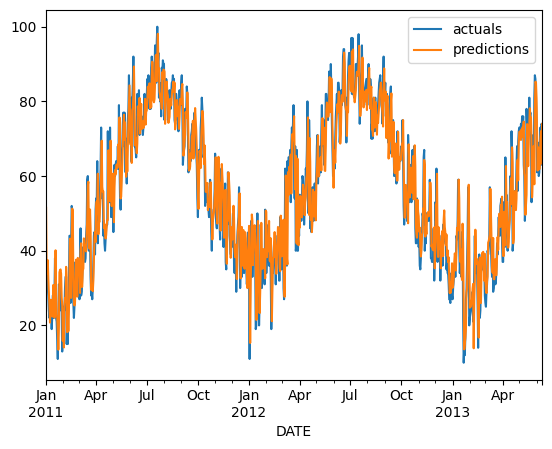

In [108]:
combined.plot()

In [109]:
reg.coef_

array([-0.8971349 , -0.03066687, -4.23314553,  0.70833668,  0.25662425])

Observation:
1. predictions are generally more conservative than actual values
2. snow and snow depth are small negative coefficients
3. precipation is large positive coefficient
4. maximum temperature and minimum temperature are positive coefficients

What is done:
1. trian a machine learning model
2. make initial predictions
3. figure out error